In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

from matplotlib import style

style.use('ggplot')

from sklearn.preprocessing import LabelEncoder
 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
train=pd.read_csv('train_dataset.csv')
train.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train_dataset.csv'

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
catagorical_values=train.select_dtypes(include=[object])
print("count of categorical features in dataset:",catagorical_values.shape[1])
numerical_values=train.select_dtypes(include=[np.float64,np.int64])
print("count of numerical features in dataset:",numerical_values.shape[1])


count of categorical features in dataset: 7
count of numerical features in dataset: 5


In [10]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Weight'>

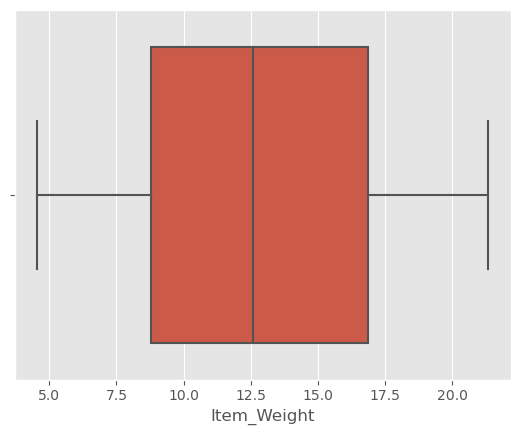

In [12]:
sns.boxplot(x=train['Item_Weight'])

In [13]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

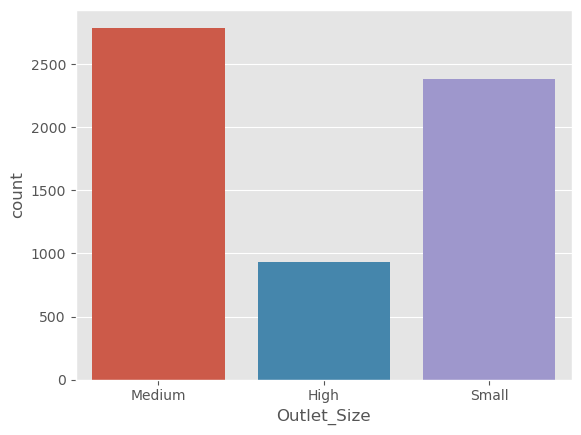

In [14]:
sns.countplot(x='Outlet_Size',data=train)

In [15]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [16]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
train.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [19]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [21]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [22]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [23]:
encoder=LabelEncoder()

In [24]:
train['Item_Identifier']= encoder.fit_transform(train['Item_Identifier'])
train['Item_Fat_Content']= encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type']= encoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier']= encoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size']= encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']= encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']= encoder.fit_transform(train['Outlet_Type'])                                              

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [26]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [27]:
x = train.drop(columns='Item_Outlet_Sales',axis=1)
y = train['Item_Outlet_Sales']

In [28]:
print('x-->',x.shape)
print('y-->',y.shape)

x--> (8523, 11)
y--> (8523,)


In [29]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [30]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (5966, 11)
x_test: (2557, 11)
y_train: (5966,)
y_test: (2557,)


In [31]:
linreg= LinearRegression()
linreg.fit(x_train,y_train)
linreg_pred= linreg.predict(x_test)

In [32]:
linreg_mea = mean_absolute_error(y_test,linreg_pred)
linreg_r2 = r2_score(y_test,linreg_pred)
print("MAE of the linear regression model is",linreg_mea)
print("r2 score of linear regression model id:",linreg_r2)

MAE of the linear regression model is 872.5237858648862
r2 score of linear regression model id: 0.5125347393057034


In [33]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.3,0,0.016047,4,249.8092,9,1999,1,0,1,3735.138


In [34]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [35]:
data = {'Item_Identifier':150, 'Item_Weight':10, 'Item_Fat_Content':0, 'Item_Visibility':0.015,
       'Item_Type':4, 'Item_MRP':250, 'Outlet_Identifier':9,
       'Outlet_Establishment_Year':2000, 'Outlet_Size':1, 'Outlet_Location_Type':0,
       'Outlet_Type':1}
index=[0]
new_train= pd.DataFrame(data,index) 
new_train


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,150,10,0,0.015,4,250,9,2000,1,0,1


In [36]:
value_pred=linreg.predict(new_train)
print("the outlet sales value for the new data set is:",value_pred)

the outlet sales value for the new data set is: [4354.54954222]
